# Load, Analyze and Clean Data

This data we will modify the data but not removing outliers
Deleted weight
Deleted Employees that did not miss any work
Normalize Data

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt

# Get and Inspect Data

In [2]:
emp_data=pd.read_excel('Absenteeism_at_work.xls')

In [3]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null int64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                            

# Clean Data

In [4]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    emp_data[i] = emp_data[i].astype("category")

for i in numerical_set :
    emp_data[i] = emp_data[i].astype("float64")  

Delete the employees that have 0 as in "Absenteeism time in hours" since this will not help the predictions.  3 employees excist that have not missed any work. 

In [5]:
## In our data set if the below features has 0 as the value ,since it is  practically not  an acceptable value, we will replace it with NA
for i in ["Reason for absence","Month of absence","Day of the week","Seasons","Education","ID","Age","Weight","Height","Body mass index", "Absenteeism time in hours" ]:
        emp_data[i] = emp_data[i].replace(0,np.nan)

clean_data=emp_data.dropna(how="any")
clean_data.head()

#Missing values
#missing_data = pd.DataFrame(emp_data.isnull().sum())
#missing_data = missing_data.rename(columns={0:"NA_sum"})
#missing_data["NA_percent"] = (missing_data["NA_sum"]/len(emp_data))*100
#missing_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26,7,3,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,4.0
2,3.0,23,7,4,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0
3,7.0,7,7,5,1,279.0,5.0,14.0,39.0,239554.0,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,4.0
4,11.0,23,7,5,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,2.0
5,3.0,23,7,6,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0


Since BMI is a function of "Weight" we will delete the feature of "Weight" so that it is not double counted. 

Delete Data
Delete the column with "Weight" as we know that BMI will already contemplate the weight and it will be redundant in the data

In [6]:
#We can delete the weight as we already know the BMI
modified_data=clean_data.drop("Weight", axis=1)

Now look at ouliers and normalize data

In [7]:
#Rename the numerical set
numerical_set = ["Transportation expense","Distance from Residence to Work","Service time","Age",
                 "Work load Average/day ","Hit target","Height","Body mass index","Absenteeism time in hours"]

C:\Users\aruba\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


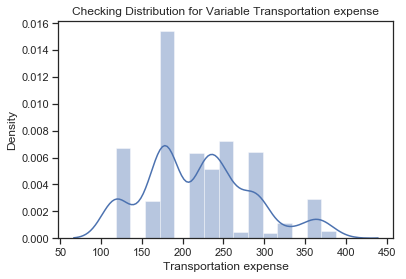

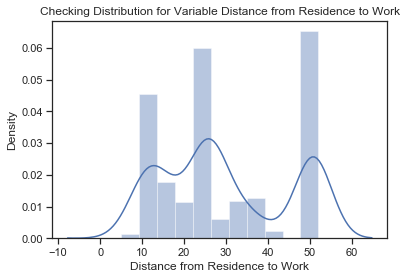

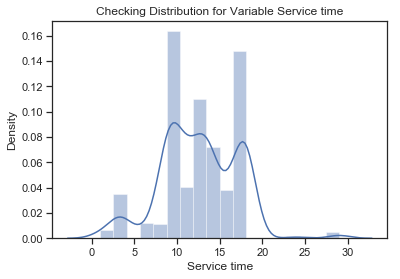

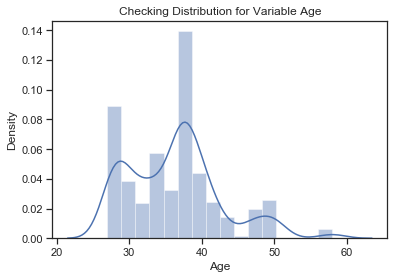

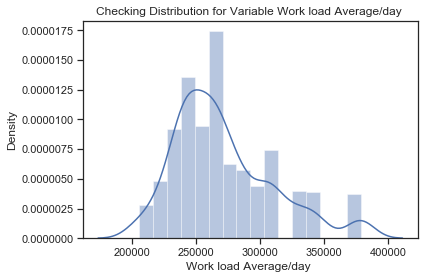

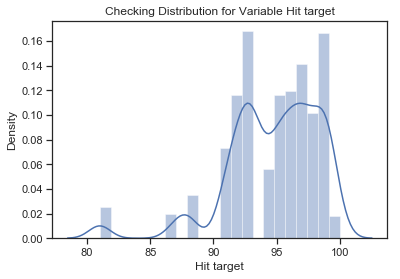

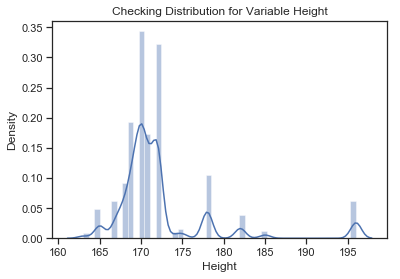

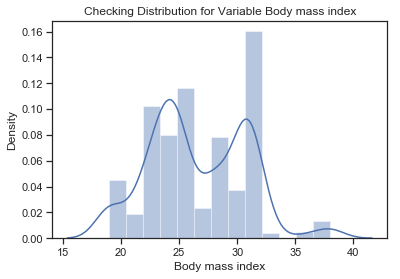

In [8]:
#Normality check
for i in numerical_set:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(modified_data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

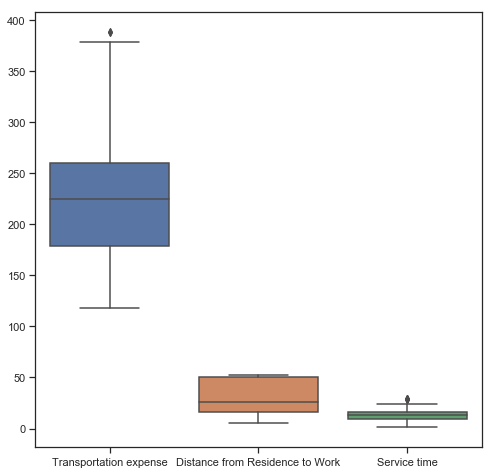

In [10]:
#Check for outliers in data using boxplot
sns.boxplot(data=modified_data[["Transportation expense","Distance from Residence to Work","Service time"]])
fig=plt.gcf()
fig.set_size_inches(8,8)

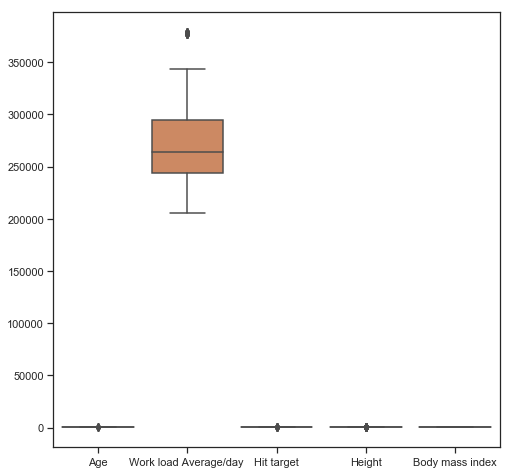

In [9]:
#Check for outliers in data using boxplot
sns.boxplot(data=modified_data[["Age","Work load Average/day ","Hit target","Height","Body mass index"]])
fig=plt.gcf()
fig.set_size_inches(8,8)

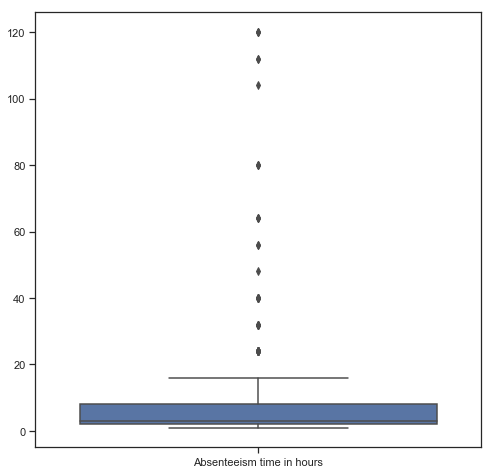

In [10]:
#Check for outliers in data using boxplot
sns.boxplot(data=modified_data[["Absenteeism time in hours"]])
fig=plt.gcf()
fig.set_size_inches(8,8)